# Novel Corona Virus 2019 Dataset
### Day level information on covid-19 affected cases

In [39]:
%load_ext autoreload
%autoreload 2

import os
import sys
import importlib
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import locale

locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

path_ds = 'datasets/originais/novel_corona_virus_2019_ds'
path_covidData = path_ds + '/covid_19_data.csv'
path_linelistData = path_ds + '/COVID19_line_list_data.csv'
path_openlineList = path_ds + '/COVID19_open_line_list.csv'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [82]:
df_covid = pd.read_csv(path_covidData, sep=',', index_col='SNo', \
                       engine='python', dtype={'ObservationDate': str, 'Last Update': str})
print(df_covid.dtypes)
df_covid.head(20)
# len(df_covid)


ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,,,
1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0


In [83]:
# países com maior número de mortes
top_covid = df_covid[['Country/Region', 'Confirmed', 'Deaths']]\
.groupby('Country/Region')\
.agg({'Confirmed': 'sum', 'Deaths': 'sum'}).reset_index().sort_values('Deaths', ascending=False)
top_covid.head(10)

,Country/Region,Confirmed,Deaths
208,US,396234081.0,16373394.0
27,Brazil,194933354.0,7403667.0
207,UK,37857807.0,5398648.0
101,Italy,35112643.0,4872239.0
70,France,29770550.0,4051434.0
188,Spain,38921479.0,3978566.0
134,Mexico,31500257.0,3531603.0
95,India,122656809.0,2703456.0
97,Iran,30414143.0,1651912.0
158,Peru,35981065.0,1428666.0


In [109]:
# df_covid_br = df_covid[df_covid['Country/Region'] == 'Brazil'].groupby('Province/State').agg({'Confirmed': 'sum'})
# df_covid_br['ObservationDate'] = df_covid_br['ObservationDate'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))
# df_covid_br['ObservationDate']  = pd.to_datetime(df_covid_br['ObservationDate'], format='%m/%d/%Y' )
# df_covid_br['Province/State'].unique()
df_covid_br = df_covid[df_covid['Country/Region'] == 'Brazil'].dropna(subset=['Province/State'])
df_covid_br

df_covid_br_pivot = df_covid_br.pivot(index='ObservationDate', columns='Province/State', values=['Confirmed', 'Deaths'])
df_covid_br_pivot['Confirmed']['Acre']

ObservationDate
05/20/2020     2817.0
05/21/2020     3103.0
05/22/2020     3343.0
05/23/2020     3867.0
05/24/2020     4160.0
               ...   
08/25/2020    23936.0
08/26/2020    24119.0
08/27/2020    24269.0
08/28/2020    24462.0
08/29/2020    24601.0
Name: Acre, Length: 102, dtype: float64

TypeError: can only concatenate str (not "int") to str

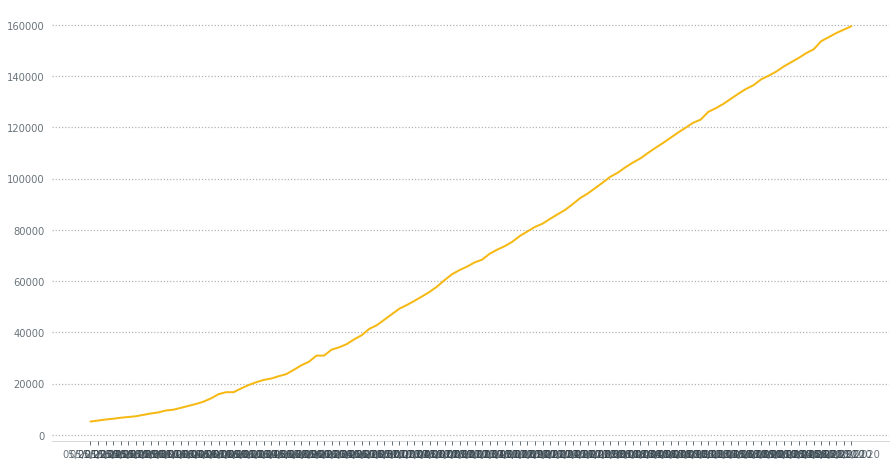

In [116]:
from multiplex import drawable
drawable = importlib.reload(drawable)
plt.style.use(os.path.join(sys.path[0], '.', 'styles', "modern.style"))

# cria o estilo de linha
style = { 'linewidth': 2, 'label_style': { 'fontweight': 500 } }

# cria o estilo específico para o DF
df_style = { 'color': '#F6B913', 'label': 'DF' }

# draw the visualization
figure = plt.figure(figsize=(15, 8))
viz = drawable.Drawable(figure)
viz.draw_time_series(df_covid_br_pivot.index.to_list(), df_covid_br_pivot['Confirmed']['Distrito Federal'], **style, **df_style)
# visualização por Confirmados
# for estado in df_covid_br_pivot.loc[:, 'Confirmed'].columns.to_list():

#     viz.draw_time_series(df_covid_br_pivot.index.to_list(), df_covid_br_pivot['Confirmed'][estado].to_list(), **style)
#     if estado == 'Distrito Federal':
#         viz.draw_time_series(df_covid_br_pivot.index.to_list(), df_covid_br_pivot['Confirmed'][estado], **style, **df_style)




In [18]:
df_linelist = pd.read_csv(path_linelistData, sep=',', index_col='ï»¿id', engine='python')
print(df_linelist.dtypes)
df_linelist.head()
len(df_linelist)

case_in_country          float64
reporting date            object
Unnamed: 3               float64
summary                   object
location                  object
country                   object
gender                    object
age                      float64
symptom_onset             object
If_onset_approximated    float64
hosp_visit_date           object
exposure_start            object
exposure_end              object
visiting Wuhan             int64
from Wuhan               float64
death                     object
recovered                 object
symptom                   object
source                    object
link                      object
Unnamed: 21              float64
Unnamed: 22              float64
Unnamed: 23              float64
Unnamed: 24              float64
Unnamed: 25              float64
Unnamed: 26              float64
dtype: object


1085

In [21]:
df_openline = pd.read_csv(path_openlineList, sep=',', engine='python')
print(df_openline.dtypes)
df_openline.head()
len(df_openline)

ï»¿ID                       float64
age                          object
sex                          object
city                         object
province                     object
country                      object
wuhan(0)_not_wuhan(1)       float64
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                      

14126